<a href="https://colab.research.google.com/github/leakydishes/Fairness_feedback_nlp_test/blob/main/phase2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deakin University Internship 2023**
##*Phase 2,* Semantic Communication

######This research (*Phase 2*) includes semantic communication implemented by using a combination of deep neural networks (NNs) and physical channel simulations. Using "Robustness_Transfer.py" (file from Phase 1) semantic encoding is performed using a DualModel (Roberta tokenizer). The preprocessed data is passed through a channel encoder (with a physical channel simulation) to test the robustness of the system under different types of noises. The channel decoder NNs with neural noise channel simulations is used to decode the semantic representations and calculate the BER values. Performance is measured by evaluating the BER values found under different noise conditions. <br>

<br>

###Project includes,
#####*Phase 1,* Human-Guided Fair Classification for NLP
#####*Phase 2,* Semantic Communication
<br>

#####References:
*@inproceedings{
dorner2023humanguided,
title={Human-Guided Fair Classification for Natural Language Processing},
author={Florian E. Dorner and Momchil Peychev and Nikola Konstantinov and Naman Goel and Elliott Ash and Martin Vechev},
booktitle={The Eleventh International Conference on Learning Representations },
year={2023},
url={https://openreview.net/forum?id=N_g8TT9Cy7f}
}*

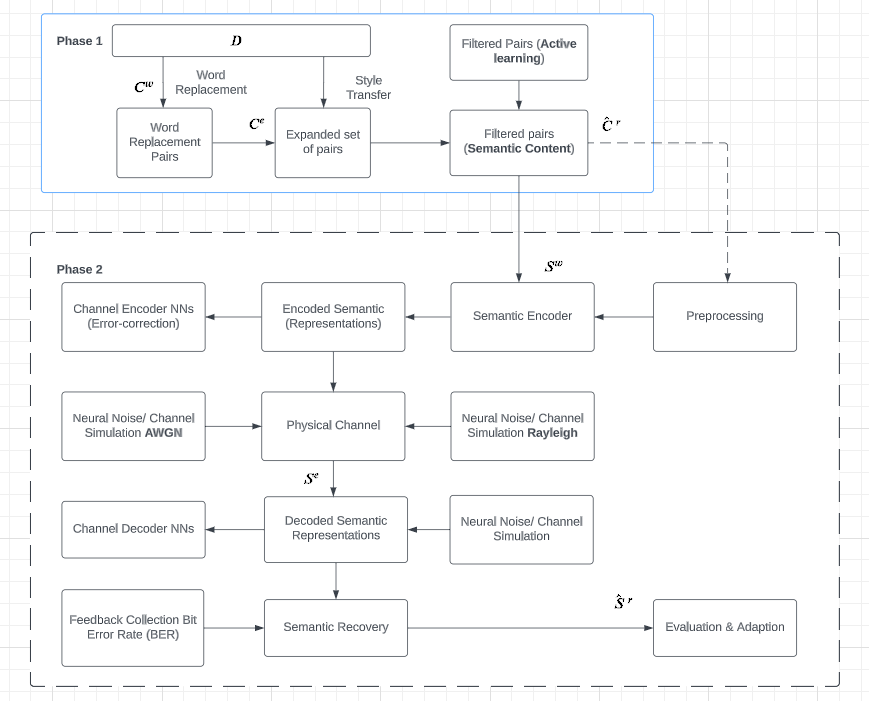

##**Step 1. Mount Google Drive and install dependencies**

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
#permanently install the specific version to the google colab
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,965 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.1 [339 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.1-2ubuntu0.22.04.1 [32.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.3 [1,305 kB]
Fetched 1,677 kB in 2s (712 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog b

In [3]:
#Install correct packages
!sudo apt-get install python3.8-distutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3.8-lib2to3
The following NEW packages will be installed:
  python3.8-distutils python3.8-lib2to3
0 upgraded, 2 newly installed, 0 to remove and 19 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,237 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-lib2to3 all 3.8.18-1+jammy1 [126 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-distutils all 3.8.18-1+jammy1 [193 kB]
Fetched 319 kB in 4s (88.9 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize front

In [4]:
%cd /content/drive/MyDrive/fairness-feedback-nlp/Code
!pip install -r requirements.txt

/content/drive/MyDrive/fairness-feedback-nlp/Code
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 114.6 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement scipy==1.6.3 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.

In [5]:
!pip install w3lib
!pip install scikit-learn
!pip install bert4keras==0.4.6

  Preparing metadata (setup.py) ... done
  Created wheel for bert4keras: filename=bert4keras-0.4.6-py3-none-any.whl size=25730 sha256=475cbae5d249a6f8c5dc104d795624f282972068d2e09bff3e0c18f57f0f7280
  Stored in directory: /root/.cache/pip/wheels/51/fc/07/4449a78fc8f7f4b180d61743700801b649f56b936fee265947
Successfully built bert4keras


### Install Transformers and libraries

In [6]:
!pip install accelerate>=0.20.3 transformers

In [11]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00


In [25]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.1 MB/s eta 0:00:00


In [28]:
!pip install datasets transformers huggingface_hub

In [29]:
!apt-get install git-lfs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


##**Step 2. Preprocessing data**

*   Reduce size of dataset (train_preprocessed) for testing
*   Sentences are in a suitable format for tokenization



In [8]:
import pandas as pd
import random

# Define the path to your original CSV file
original_csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed.csv"

# Define the path to save the reduced dataset
reduced_csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_twenty.csv"

# Load your original CSV data using pandas
df = pd.read_csv(original_csv_path)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42)

# Calculate the size of the reduced dataset (1/6 of the original size)
reduced_size = len(df) // 20

# Take the first 1/3 of the dataset to create a reduced dataset
reduced_df = df[:reduced_size]

# Save the reduced dataset to a new CSV file
reduced_df.to_csv(reduced_csv_path, index=False)

In [9]:
import pandas as pd

# Define the paths to the CSV files
original_csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed.csv"
reduced_one_third_csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced.csv"
reduced_one_sixth__csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_sixth.csv"
reduced_one_twenty__csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_twenty.csv"
reduced_one_fifty__csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_fifty.csv"

# Load the CSV data using pandas
df_original = pd.read_csv(original_csv_path)
df_reduced1 = pd.read_csv(reduced_one_third_csv_path)
df_reduced2 = pd.read_csv(reduced_one_sixth__csv_path)
df_reduced3 = pd.read_csv(reduced_one_twenty__csv_path)
df_reduced4 = pd.read_csv(reduced_one_fifty__csv_path)

# Get the number of items in each CSV
num_items_original = len(df_original)
num_items_reduced1 = len(df_reduced1)
num_items_reduced2 = len(df_reduced2)
num_items_reduced3 = len(df_reduced3)
num_items_reduced4 = len(df_reduced4)

# Print the number of items
print("Number of items in the original CSV:", num_items_original)
print("Number of items in the reduced CSV 1/3:", num_items_reduced1)
print("Number of items in the reduced CSV 1/6:", num_items_reduced2)
print("Number of items in the reduced CSV 1/20:", num_items_reduced3)
print("Number of items in the reduced CSV 1/50:", num_items_reduced4)

Number of items in the original CSV: 1804874
Number of items in the reduced CSV 1/3: 601624
Number of items in the reduced CSV 1/6: 300812
Number of items in the reduced CSV 1/20: 90243
Number of items in the reduced CSV 1/50: 36097


In [10]:
# Print a sample of CSV
# Load your CSV data using pandas
csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_fifty.csv"

# Load your CSV data using pandas
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame to see a sample of the CSV file
print(df.head())

   Unnamed: 0       id    target  \
0      286892   593336  0.166667   
1      419218   756192  0.600000   
2     1055330  5407051  0.000000   
3     1382764  5808132  0.000000   
4      256049   557013  0.000000   

                                        comment_text  severe_toxicity  \
0  What a breathe of fresh air to have someone wh...              0.0   
1  Your jewish friends were the ones who told you...              0.2   
2  Possible collusion by Trump and his affiliates...              0.0   
3  Exactly.  We need a % of GDP spending cap at t...              0.0   
4  By your own comment, even if some of them vote...              0.0   

   obscene  identity_attack    insult  threat  asian  ...  article_id  \
0      0.0              0.0  0.166667     0.0    NaN  ...      151356   
1      0.0              0.6  0.400000     0.0    0.0  ...      158493   
2      0.0              0.0  0.000000     0.0    NaN  ...      343435   
3      0.0              0.0  0.000000     0.0    NaN

### Dataset for 1/50 of CSV data for small and medium dataset model testing

###Explore the data - Visualisation

In [162]:
import pandas as pd
from datasets import Dataset
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_fifty.csv"

# Load your CSV data using pandas
df = pd.read_csv(csv_path)

# Add a new column "label" based on the "target" column
df["label"] = df["target"].apply(lambda x: 1 if x > 0.1 else 0)

# Select and keep only the "comment_text" and "label" columns
selected_columns = ["comment_text", "label"]
df = df[selected_columns]

# Convert the columns to dictionaries and combine them into a single dictionary
data_dict = {"comment_text": df["comment_text"].tolist(), "label": df["label"].tolist()}

# Create a Hugging Face dataset
dataset = Dataset.from_dict(data_dict)

# Save the dataset
dataset.save_to_disk("/content/drive/MyDrive/fairness-feedback-nlp/Code/Dataset_Dictionary")

# Load the dataset
loaded_dataset = Dataset.load_from_disk("/content/drive/MyDrive/fairness-feedback-nlp/Code/Dataset_Dictionary")

# Print the dataset with the selected and renamed columns
print(loaded_dataset)

# Explore the data - Visualisation
df = loaded_dataset.select(range(5)).to_pandas()
print(df.head())

Saving the dataset (0/1 shards):   0%|          | 0/36097 [00:00<?, ? examples/s]

Dataset({
    features: ['comment_text', 'label'],
    num_rows: 36097
})
                                        comment_text  label
0  What a breathe of fresh air to have someone wh...      1
1  Your jewish friends were the ones who told you...      1
2  Possible collusion by Trump and his affiliates...      0
3  Exactly.  We need a % of GDP spending cap at t...      0
4  By your own comment, even if some of them vote...      0


In [ ]:
import matplotlib.pyplot as plt
label_counts = ['label'].value_counts().sort_index()
ax = label_counts.plot(kind='barh', title='Count Labels (0 = positive or 1 = negative)', figsize=(6, 3), color=["green", "red"])
ax.set_ylabel('Review targets')
ax.set_xlabel('Count')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-187-038d18e4f6a4>", line 2, in <cell line: 2>
    label_counts = loaded_dataset['label'].value_counts().sort_index()
AttributeError: 'list' object has no attribute 'value_counts'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, t

### Dataset for 1/6 of CSV data for large dataset model testing

In [141]:
from datasets import Dataset
import pandas as pd

# Define the path to your CSV file
csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_sixth.csv"

# Load your CSV data using pandas
df_large = pd.read_csv(csv_path)

# Add a new column "label" based on the "target" column
df_large["label"] = df_large["target"].apply(lambda x: 1 if x > 0.1 else 0)

# Select and keep only the "comment_text" and "numerical_target" columns
selected_columns = ["target", "comment_text", "label"]
df_large = df_large[selected_columns]

# Convert the DataFrame to a dictionary
data_dict_large = df_large.to_dict(orient="list")

# Create a Hugging Face dataset
dataset_large = Dataset.from_dict(data_dict_large)

# Save the dataset
dataset_large.save_to_disk("/content/drive/MyDrive/fairness-feedback-nlp/Code/Dataset_Dictionary_large")

# Load the dataset
loaded_dataset_large = Dataset.load_from_disk("/content/drive/MyDrive/fairness-feedback-nlp/Code/Dataset_Dictionary_large")

# Print the dataset with the selected and renamed columns
print(loaded_dataset_large)

Saving the dataset (0/1 shards):   0%|          | 0/300812 [00:00<?, ? examples/s]

Dataset({
    features: ['target', 'comment_text', 'label'],
    num_rows: 300812
})


In [13]:
# Print the first couple of samples from loaded_dataset
# Numerical Target means: negative = 1 and positive = 0 based on target column.
num_samples_to_print = 5  # Change this number as needed
for i in range(num_samples_to_print):
    sample = loaded_dataset[i]
    print(f"Sample {i + 1}:")
    print(f"Comment Text: {sample['comment_text']}")
    print(f"Label: {sample['label']}")
    print(f"Target: {sample['target']}")
    print()

Sample 1:
Comment Text: What a breathe of fresh air to have someone who embraces common sense values, instead of the leadership we have in Canada, that is clearly on a different page, perhaps reading from a different book.
Label: 1
Target: 0.1666666666666666

Sample 2:
Comment Text: Your jewish friends were the ones who told you that Zionists control Canada?  Very believable.. hahaha.  Do your jewish friends get their info from a white supremacist web site, or do they publish the sites themselves, given that jews control the media and such?   That is, when they're taking off time from controlling the banks.
Label: 1
Target: 0.6

Sample 3:
Comment Text: Possible collusion by Trump and his affiliates has not been debunked, as you state. The matter is one focus of the ongoing investigations. The existence of ongoing investigations of collusion is factual even though it might conflict with diatribe and political spin of some persons' echo chambers.
Label: 0
Target: 0.0

Sample 4:
Comment T

### Split Dataset for 1/50

In [142]:
#https://huggingface.co/blog/sentiment-analysis-python
from sklearn.model_selection import train_test_split
from datasets import load_dataset, DatasetDict

# 90% train, 10% test + validation
train_testvalid = loaded_dataset.train_test_split(test_size=0.1, shuffle=True, seed=42)

# Split the 10% test + valid in half test, half valid
test_valid = train_testvalid['test'].train_test_split(test_size=0.5, shuffle=True, seed=42)

# Gather everyone if you want to have a single DatasetDict
train_test_valid_dataset = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']
})

print(train_test_valid_dataset)

DatasetDict({
    train: Dataset({
        features: ['target', 'comment_text', 'label'],
        num_rows: 32487
    })
    test: Dataset({
        features: ['target', 'comment_text', 'label'],
        num_rows: 1805
    })
    valid: Dataset({
        features: ['target', 'comment_text', 'label'],
        num_rows: 1805
    })
})


### Split Dataset for 1/6

In [144]:
#https://huggingface.co/blog/sentiment-analysis-python
from sklearn.model_selection import train_test_split
from datasets import load_dataset, DatasetDict

# Load the dataset
loaded_dataset_large = Dataset.load_from_disk("/content/drive/MyDrive/fairness-feedback-nlp/Code/Dataset_Dictionary_large")

# 90% train, 10% test + validation
train_testvalid_large = loaded_dataset_large.train_test_split(test_size=0.1, shuffle=True, seed=42)

# Split the 10% test + valid in half test, half valid
test_valid_large = train_testvalid_large['test'].train_test_split(test_size=0.5, shuffle=True, seed=42)

# Gather everyone if you want to have a single DatasetDict
train_test_valid_dataset_large = DatasetDict({
    'train': train_testvalid_large['train'],
    'test': test_valid_large['test'],
    'valid': test_valid_large['train']
})

print(train_test_valid_dataset_large)

DatasetDict({
    train: Dataset({
        features: ['target', 'comment_text', 'label'],
        num_rows: 270730
    })
    test: Dataset({
        features: ['target', 'comment_text', 'label'],
        num_rows: 15041
    })
    valid: Dataset({
        features: ['target', 'comment_text', 'label'],
        num_rows: 15041
    })
})


In [145]:
# Small testing dataset
small_train_dataset = train_test_valid_dataset["train"].shuffle(seed=42).select([i for i in list(range(3000))])
small_test_dataset = train_test_valid_dataset["test"].shuffle(seed=42).select([i for i in list(range(300))]) # 10% of data to test

# Med testing dataset
med_train_dataset = train_test_valid_dataset["train"].shuffle(seed=42).select([i for i in list(range(18000))])
med_test_dataset = train_test_valid_dataset["test"].shuffle(seed=42).select([i for i in list(range(1800))]) # 10% of data to test

# Large testing dataset
large_train_dataset = train_test_valid_dataset_large["train"].shuffle(seed=42).select([i for i in list(range(150410))])
Large_test_dataset = train_test_valid_dataset_large["test"].shuffle(seed=42).select([i for i in list(range(15041))]) # 10% of data to test

In [122]:
print(f"small_train_dataset: {small_train_dataset}")
print(f"small_test_dataset: {small_test_dataset}")

small_train_dataset: Dataset({
    features: ['target', 'comment_text', 'label'],
    num_rows: 3000
})
small_test_dataset: Dataset({
    features: ['target', 'comment_text', 'label'],
    num_rows: 300
})


In [123]:
print(f"med_train_dataset: {med_train_dataset}")
print(f"med_test_dataset: {med_test_dataset}")

med_train_dataset: Dataset({
    features: ['target', 'comment_text', 'label'],
    num_rows: 18000
})
med_test_dataset: Dataset({
    features: ['target', 'comment_text', 'label'],
    num_rows: 1800
})


In [146]:
print(f"large_train_dataset: {large_train_dataset}")
print(f"Large_test_dataset: {Large_test_dataset}")

large_train_dataset: Dataset({
    features: ['target', 'comment_text', 'label'],
    num_rows: 150410
})
Large_test_dataset: Dataset({
    features: ['target', 'comment_text', 'label'],
    num_rows: 15041
})


##**Step 3. Preprocessing for DistilBERT**

*   Load DistilBERT tokenizer to preprocess text field
*   Create preprocessing function to tokenize text and truncate sequences



In [18]:
# Load a DistilBERT tokenizer to preprocess the text field
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [124]:
#Create a preprocessing function to tokenize text and truncate sequences to be no longer than DistilBERT’s maximum input length
def preprocess_function(examples):
  return tokenizer(examples["comment_text"], truncation=True)

In [147]:
print("tokensized (small)")
tokenized_train = small_train_dataset.map(preprocess_function, batched=True)
tokenized_test = small_test_dataset.map(preprocess_function, batched=True)

print("tokensized (med)")
tokenized_train_med = med_train_dataset.map(preprocess_function, batched=True)
tokenized_test_med = med_test_dataset.map(preprocess_function, batched=True)

print("tokensized (large)")
tokenized_train_large = large_train_dataset.map(preprocess_function, batched=True)
tokenized_test_large = Large_test_dataset.map(preprocess_function, batched=True)

tokensized (small)


Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

tokensized (med)


Map:   0%|          | 0/18000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1800 [00:00<?, ? examples/s]

tokensized (large)


Map:   0%|          | 0/150410 [00:00<?, ? examples/s]

Map:   0%|          | 0/15041 [00:00<?, ? examples/s]

In [148]:
print("tokensized (small data)")
print(tokenized_train)
print(tokenized_test)

print("tokensized (med data)")
print(tokenized_train_med)
print(tokenized_test_med)

print("tokensized (large data)")
print(tokenized_train_large)
print(tokenized_test_large)

tokensized (small data)
Dataset({
    features: ['target', 'comment_text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 3000
})
Dataset({
    features: ['target', 'comment_text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 300
})
tokensized (med data)
Dataset({
    features: ['target', 'comment_text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 18000
})
Dataset({
    features: ['target', 'comment_text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 1800
})
tokensized (large data)
Dataset({
    features: ['target', 'comment_text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 150410
})
Dataset({
    features: ['target', 'comment_text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 15041
})


In [128]:
# To speed up training, data_collator convert your training samples to PyTorch tensors and concatenate them with the correct amount of padding
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

##**Step 4. Training Model for DistilBERT**

*   DistilBERT (base model)
*   Create metrics function to evaluate fine-tuned model
*   huggingface_hub (notebook log in) to load/ save model <br>

<br>

### Testing outomes, training data size increase required to improve variance percentage
*   Train DistilBERT Model (3000 samples)
*   Train DistilBERT Model (18000 samples)

<br>

### Set up DistilBERT base model
*   AutoModelForSequenceClassification

In [129]:
# DistilBERT (base model)
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [130]:
# metrics to evaluate fine-tuned model
import numpy as np
from datasets import load_metric

def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")

   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   return {"accuracy": accuracy, "f1": f1}

In [24]:
from huggingface_hub import notebook_login
notebook_login()

In [26]:
# Evaluate https://huggingface.co/docs/evaluate/index
import evaluate
accuracy = evaluate.load("accuracy")

In [27]:
import torch
torch.cuda.is_available()

True

### Train DistilBERT Model (3000 samples)

In [32]:
from transformers import TrainingArguments, Trainer

repo_name = "finetuning-sentiment-model-3000-samples"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

In [33]:
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


TrainOutput(global_step=376, training_loss=0.4659020038361245, metrics={'train_runtime': 88.3494, 'train_samples_per_second': 67.912, 'train_steps_per_second': 4.256, 'total_flos': 306072134004000.0, 'train_loss': 0.4659020038361245, 'epoch': 2.0})

In [38]:
#Evaluate
trainer.evaluate()

{'eval_loss': 0.5267420411109924,
 'eval_accuracy': 0.7733333333333333,
 'eval_f1': 0.6,
 'eval_runtime': 2.8113,
 'eval_samples_per_second': 106.714,
 'eval_steps_per_second': 6.759,
 'epoch': 2.0}

In [39]:
#Model to hub for pipeline class usage
trainer.push_to_hub()

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

events.out.tfevents.1699141369.d1d882a29e2e.623.0:   0%|          | 0.00/4.51k [00:00<?, ?B/s]

events.out.tfevents.1699141470.d1d882a29e2e.623.1:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

'https://huggingface.co/LeakyDishes/finetuning-sentiment-model-3000-samples/tree/main/'

In [185]:
from transformers import pipeline # Pipeline class analyse sentences
specific_comment_text = loaded_dataset["comment_text"][11] # Sentences from loaded_dataset
specific_value = loaded_dataset["label"][11] # Sentences from loaded_dataset
if specific_value == 1:
    specific_value = "positive (LABEL_0)"
else:
    specific_value = "negative (LABEL_1)"

print(f"specific_comment_text: {specific_comment_text}")
print(f"specific_value: {specific_value}")

sentiment_model = pipeline(model="LeakyDishes/finetuning-sentiment-model-3000-samples")
sentiment_model(specific_comment_text)

specific_comment_text: So I guess the "Life in Prison" for "Treason" predictions while they were at Malheur are off the table, then?  So many disappointed anti-gun nuts!  So many sad liberals!  So many armchair  psuedo-attorneys losing even more credibility.
specific_value: negative (LABEL_1)


[{'label': 'LABEL_1', 'score': 0.8626046180725098}]

### Label meaning

*   LABEL_0 = negative
*   LABEL_1 = positive

### Clarification

*   LABEL_0, means it model belives text has a negative or non-positive sentiment.
*   LABEL_1, means it model belives text has a positive sentiment.



In [98]:
from transformers import pipeline
from datasets import Dataset

sentiment_model = pipeline(model="LeakyDishes/finetuning-sentiment-model-3000-samples") #sentiment analysis pipeline

# Create a copy of your dataset for sentiment analysis
small_test_dataset_sentiment = Dataset.from_dict({
    'comment_text': small_test_dataset['comment_text'],
    'target': small_test_dataset['target']
})

sentiment_labels = []  # Store sentiment labels (0 or 1) in list

# Iterate sentences to get sentiment analysis
for sentence in small_test_dataset_sentiment['comment_text']:
    sentiment_result = sentiment_model(sentence)
    sentiment_label = int(sentiment_result[0]['label'].split('_')[-1])  # Extract the label and convert to int
    sentiment_labels.append(sentiment_label)
    print(f"Sentence: {sentence}")
    print("Sentiment Analysis:", sentiment_result)
    print("-" * 30)

count_label_0 = sentiment_labels.count(0) #Labels = 0
count_label_1 = sentiment_labels.count(1) #Labels = 1
print(f"Number of LABEL_0: {count_label_0}")
print(f"Number of LABEL_1: {count_label_1}")


Sentence: I suspect the answer is yes
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.955387532711029}]
------------------------------
Sentence: Creswell was already "courted" by a casino a few years back... trying to buy the town and it's citizens.....as you can see....no casino ....Creswell knows how to say no to big money trying to buy out the city....
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.7660173773765564}]
------------------------------
Sentence: And probably very, very wealthy as well....
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.9086263179779053}]
------------------------------
Sentence: Don't forget the money he handed over to the oil companies. About $1,300 for every Alaskan. This year!  And more next year.  And the year after that...
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.9544424414634705}]
------------------------------
Sentence: Attention C.F.L. bashers: blah, blah, blah! Grow-up & get a life! If you don't like the C.F.L., fine. 

In [105]:
from datasets import load_dataset
label_0_count = small_test_dataset["label"].count(0)
label_1_count = small_test_dataset["label"].count(1)

print("Original Data Set (Test 300 values)")
print(f"Number of LABEL_0: {label_0_count}")
print(f"Number of LABEL_1: {label_1_count}")


Original Data Set (Test 300 values)
Number of LABEL_0: 211
Number of LABEL_1: 89


In [109]:
# Calculate variance percentage (LABEL_0)
variance_percentage_label_0 = abs(count_label_0 - label_0_count) / count_label_0 * 100
print(f"Variance Percentage for LABEL_0: {variance_percentage_label_0}%")

# Calculate variance percentage (LABEL_1)
variance_percentage_label_1 = abs(count_label_1 - label_1_count) / count_label_1 * 100
print(f"Variance Percentage for LABEL_1: {variance_percentage_label_1}%")

Variance Percentage for LABEL_0: 3.65296803652968%
Variance Percentage for LABEL_1: 9.876543209876543%


In [186]:
from transformers import pipeline

class SentimentAnalyzer:
    def __init__(self, model_name="LeakyDishes/finetuning-sentiment-model-3000-samples"):
        self.sentiment_model = pipeline(model=model_name)

    def analyze_and_print(self, comment_text, label):
        if label == 1:
            label = "positive (LABEL_0)"
        else:
            label = "negative (LABEL_1)"

        print(f"Specific Comment Text: {comment_text}")
        print(f"Specific Value: {label}")

        result = self.sentiment_model(comment_text)
        print(f"Sentiment Analysis Result: {result[0]['label']}")

# Usage:
analyzer = SentimentAnalyzer()

# Test multiple predictions
indices_to_test = [0, 40, 5]  # Add more indices as needed
for index in indices_to_test:
    specific_comment_text = loaded_dataset["comment_text"][index]
    specific_value = loaded_dataset["label"][index]
    analyzer.analyze_and_print(specific_comment_text, specific_value)


Specific Comment Text: What a breathe of fresh air to have someone who embraces common sense values, instead of the leadership we have in Canada, that is clearly on a different page, perhaps reading from a different book.
Specific Value: positive (LABEL_0)
Sentiment Analysis Result: LABEL_0
Specific Comment Text: Chicago and DC.   Murder capitals of the US.  Tightest gun laws in  the US.  Does that tell you anything.   You might and I repeat might lower shootings with tighter gun laws, but the nuts will find other ways to carry out their agenda.   People hold up Australia as an example of what tighter gun laws can do, but they still have their own massacres.  Some shootings, but also but other means as well.   Look at some of the recent ISIS attacks.  Not a gun in sight.   Nuts will be nuts.
Specific Value: negative (LABEL_1)
Sentiment Analysis Result: LABEL_1
Specific Comment Text: My thought too. If they care so much for it they can put their money where their mouth is and buy the th

### Train DistilBERT Model (18000 samples)



In [131]:
from transformers import TrainingArguments, Trainer

repo_name = "finetuning-sentiment-model-18000-samples"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train_med,
   eval_dataset=tokenized_test_med,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)


In [132]:
trainer.train()

Step,Training Loss
500,0.488200
1000,0.437800
1500,0.366500
2000,0.351800


TrainOutput(global_step=2250, training_loss=0.4012981906467014, metrics={'train_runtime': 214.6623, 'train_samples_per_second': 167.705, 'train_steps_per_second': 10.482, 'total_flos': 1845212908791168.0, 'train_loss': 0.4012981906467014, 'epoch': 2.0})

In [133]:
from transformers import pipeline # Pipeline class to analyse sentences
trainer.evaluate() #Evaluate
trainer.push_to_hub() #Model to hub for pipeline class usage
sentiment_model = pipeline(model="LeakyDishes/finetuning-sentiment-model-18000-samples")
sentiment_model(["Here we go again, those damned Mormons.", "Thank God that lady was able to protect herself."])
sentiment_model = pipeline(model="LeakyDishes/finetuning-sentiment-model-18000-samples")
sentiment_model(["This woman should get a medal", "Is running over and killing a woman a manufactured crisis?"])

events.out.tfevents.1699149616.d1d882a29e2e.623.5:   0%|          | 0.00/457 [00:00<?, ?B/s]

[{'label': 'LABEL_0', 'score': 0.926291286945343},
 {'label': 'LABEL_1', 'score': 0.9345415830612183}]

In [134]:
sentiment_model = pipeline(model="LeakyDishes/finetuning-sentiment-model-18000-samples") # Sentiment analysis pipeline

# Create copy of dataset sentiment analysis
small_test_dataset_sentiment = Dataset.from_dict({
    'comment_text': small_test_dataset['comment_text'],
    'target': small_test_dataset['target']
})

sentiment_labels = []  # Store sentiment labels (0 or 1) in list
# Iterate sentences find sentiment analysis
for sentence in small_test_dataset_sentiment['comment_text']:
    sentiment_result = sentiment_model(sentence)
    sentiment_label = int(sentiment_result[0]['label'].split('_')[-1])  # Extract the label and convert to int
    sentiment_labels.append(sentiment_label)
    print(f"Sentence: {sentence}")
    print("Sentiment Analysis:", sentiment_result)
    print("-" * 30)

count_label_0_med = sentiment_labels.count(0) # Label = 0
count_label_1_med = sentiment_labels.count(1) # Label = 1

Sentence: Enough of the whining from people like Kara Moriarty and Dan Dickinson. If the oil companies can't make a profit of off oil, that's their problem. If Alaska can't make a profit off of selling our oil to the oil companies, that's our problem. And make no mistake, one has absolutely nothing to do with the other.   If we can't make a profit off of selling our oil, we should just leave it in the ground until we can. We should not be cutting any slack to the oil companies during periods of low prices since they don't cut us any, no matter the price.  In the end, we need to end bought and paid for conservative governance in Alaska. The legislature's allegiance should be to Alaskans, not oil companies as republicans think.
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.954810619354248}]
------------------------------
Sentence: Liar and a traitor
Sentiment Analysis: [{'label': 'LABEL_1', 'score': 0.9817298650741577}]
------------------------------
Sentence: Burbling and driveli

In [137]:
print("Original Data Set (Test 300 values)")
print(f"Number of LABEL_0: {label_0_count}")
print(f"Number of LABEL_1: {label_1_count}")

print("Model trained on 18000 Data Set (Test 300 values)")
print(f"Number of LABEL_0: {count_label_0_med}")
print(f"Number of LABEL_1: {count_label_1_med}")

Original Data Set (Test 300 values)
Number of LABEL_0: 211
Number of LABEL_1: 89
Model trained on 18000 Data Set (Test 300 values)
Number of LABEL_0: 217
Number of LABEL_1: 83


In [138]:
# Calculate variance percentage (LABEL_0)
variance_percentage_label_0 = abs(label_0_count - count_label_0_med) / label_0_count * 100
print(f"Variance Percentage for LABEL_0: {variance_percentage_label_0}%")

# Calculate variance percentage (LABEL_1)
variance_percentage_label_1 = abs(label_1_count - count_label_1_med) / label_1_count * 100
print(f"Variance Percentage for LABEL_1: {variance_percentage_label_1}%")

Variance Percentage for LABEL_0: 2.843601895734597%
Variance Percentage for LABEL_1: 6.741573033707865%


In [184]:
from transformers import pipeline

class SentimentAnalyzer:
    def __init__(self, model_name="LeakyDishes/finetuning-sentiment-model-18000-samples"):
        self.sentiment_model = pipeline(model=model_name)

    def analyze_and_print(self, comment_text, label):
        if label == 1:
            label = "positive (LABEL_0)"
        else:
            label = "negative (LABEL_1)"

        print(f"Specific Comment Text: {comment_text}")
        print(f"Specific Value: {label}")

        result = self.sentiment_model(comment_text)
        print(f"Sentiment Analysis Result: {result[0]['label']}")

# Usage:
analyzer = SentimentAnalyzer()

# Test multiple predictions
indices_to_test = [0, 40, 5]  # Add more indices as needed
for index in indices_to_test:
    specific_comment_text = loaded_dataset["comment_text"][index]
    specific_value = loaded_dataset["label"][index]
    analyzer.analyze_and_print(specific_comment_text, specific_value)


Specific Comment Text: What a breathe of fresh air to have someone who embraces common sense values, instead of the leadership we have in Canada, that is clearly on a different page, perhaps reading from a different book.
Specific Value: positive (LABEL_0)
Sentiment Analysis Result: LABEL_0
Specific Comment Text: Chicago and DC.   Murder capitals of the US.  Tightest gun laws in  the US.  Does that tell you anything.   You might and I repeat might lower shootings with tighter gun laws, but the nuts will find other ways to carry out their agenda.   People hold up Australia as an example of what tighter gun laws can do, but they still have their own massacres.  Some shootings, but also but other means as well.   Look at some of the recent ISIS attacks.  Not a gun in sight.   Nuts will be nuts.
Specific Value: negative (LABEL_1)
Sentiment Analysis Result: LABEL_1
Specific Comment Text: My thought too. If they care so much for it they can put their money where their mouth is and buy the th

###Semantic Encoding
#### Tokenize sentences, obtain embeddings using the Roberta model trained from phase 1

In [110]:
import torch
import torch.nn as nn
from transformers import RobertaTokenizer, RobertaModel
import pandas as pd
import numpy as np
import os

# Load pre-trained RoBERTa model and tokenizer
model_name = "roberta-base"
model = RobertaModel.from_pretrained(model_name)
tokenizer = RobertaTokenizer.from_pretrained(model_name)

# Load text
text_data = small_test_dataset['comment_text']

# Parameters
max_length = 15
input_dim = model.config.hidden_size
output_dim = 2  # Example output dimension
num_epochs = 5
batch_size = 32
learning_rate = 1e-3

# Encoding function
def encode_text(text, tokenizer, model, max_length):
    tokens = tokenizer.tokenize(text)
    if len(tokens) > max_length - 2:
        tokens = tokens[:max_length - 2]  # Trim tokens to fit max_length
    tokens = ["[CLS]"] + tokens + ["[SEP]"]  # Add [CLS] and [SEP] tokens
    padded_tokens = tokens + ['[PAD]' for _ in range(max_length - len(tokens))]

    attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
    seg_ids = [0 for _ in range(len(padded_tokens))]

    sent_ids = tokenizer.convert_tokens_to_ids(padded_tokens)
    token_ids = torch.tensor(sent_ids).unsqueeze(0)
    attn_mask = torch.tensor(attn_mask).unsqueeze(0)
    seg_ids = torch.tensor(seg_ids).unsqueeze(0)

    output = model(token_ids, attention_mask=attn_mask, token_type_ids=seg_ids)
    last_hidden_state, pooler_output = output[0], output[1]

    return pooler_output

# Create a DataFrame for processed data
mean_embeddings = []
for text in text_data:
    embeddings = encode_text(text, tokenizer, model, max_length)
    mean_embeddings.append(embeddings.tolist())

data = {"Text": text_data, "Embeddings": mean_embeddings}
df = pd.DataFrame(data)

# Store the DataFrame as a CSV file
output_csv_file = "/content/drive/MyDrive/fairness-feedback-nlp/Code/embeddings/encoded_data.csv"
df.to_csv(output_csv_file, index=False)

print("Encoded data has been stored in", output_csv_file)

# Add a linear layer for fine-tuning
class FineTuningLinear(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FineTuningLinear, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

# Example usage:
input_dim = model.config.hidden_size
output_dim = 2  # Example output dimension
fine_tuning_layer = FineTuningLinear(input_dim, output_dim)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Encoded data has been stored in /content/drive/MyDrive/fairness-feedback-nlp/Code/embeddings/encoded_data.csv


##**Step 3. Physical Channel with different types of noise**
####AWGN, Rayleigh fading, and multiplicative Guassian noise (test robustness of semantic encoding)
######Compare the effects of different types of noise on the quality of the embeddings.

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the saved embeddings
loaded_embeddings = np.load(output_file)

# Define functions to add noise to embeddings
def add_awgn_noise(embeddings, snr_dB):
    # Calculate the noise standard deviation based on SNR
    snr = 10 ** (snr_dB / 10)
    signal_power = np.mean(embeddings ** 2)
    noise_power = signal_power / snr
    noise = np.random.normal(0, np.sqrt(noise_power), embeddings.shape)
    noisy_embeddings = embeddings + noise
    return noisy_embeddings

def add_rayleigh_fading(embeddings, fading_factor):
    noisy_embeddings = embeddings * fading_factor
    return noisy_embeddings

def add_multiplicative_gaussian_noise(embeddings, noise_std):
    noise = np.random.normal(1, noise_std, embeddings.shape)
    noisy_embeddings = embeddings * noise
    return noisy_embeddings

# Choose a target sentence for comparison (you can change this as needed)
target_sentence_index = 0
target_embedding = loaded_embeddings[target_sentence_index]

# Define SNR (Signal-to-Noise Ratio) and fading factor
awgn_snr_dB = 20  # Adjust the SNR in dB as needed
rayleigh_fading_factor = 0.5  # Adjust the fading factor as needed
multiplicative_noise_std = 0.2  # Adjust the multiplicative noise standard deviation as needed

# Add noise to the target embedding
awgn_noisy_embedding = add_awgn_noise(target_embedding, awgn_snr_dB)
rayleigh_noisy_embedding = add_rayleigh_fading(target_embedding, rayleigh_fading_factor)
multiplicative_noisy_embedding = add_multiplicative_gaussian_noise(target_embedding, multiplicative_noise_std)

# Calculate cosine similarity with all other sentences for each noisy embedding
similarities_awgn = cosine_similarity([awgn_noisy_embedding], loaded_embeddings)
similarities_rayleigh = cosine_similarity([rayleigh_noisy_embedding], loaded_embeddings)
similarities_multiplicative = cosine_similarity([multiplicative_noisy_embedding], loaded_embeddings)

# Get the most similar sentences for each noisy embedding
num_similar_sentences = 5
most_similar_awgn_indices = np.argsort(-similarities_awgn)[0][1:num_similar_sentences + 1]
most_similar_rayleigh_indices = np.argsort(-similarities_rayleigh)[0][1:num_similar_sentences + 1]
most_similar_multiplicative_indices = np.argsort(-similarities_multiplicative)[0][1:num_similar_sentences + 1]

# Print the most similar sentences for each noisy embedding
print("Target Sentence:")
print(sentences[target_sentence_index])

print("\nMost Similar Sentences with AWGN Noise:")
for index in most_similar_awgn_indices:
    print(sentences[index])

print("\nMost Similar Sentences with Rayleigh Fading:")
for index in most_similar_rayleigh_indices:
    print(sentences[index])

print("\nMost Similar Sentences with Multiplicative Gaussian Noise:")
for index in most_similar_multiplicative_indices:
    print(sentences[index])


####Calculate the Structural Similarity Index (SSIM) using scikit-image

##### The ssim function returns an SSIM score between -1 and 1, where 1 indicates perfect similarity between the two images, and values closer to -1 indicate less similarity.


In [ ]:
# # Install library
# !pip install scikit-image

In [ ]:
# # Calculate SSIM
# ssim_score = ssim(original_embeddings, noisy_embeddings, data_range=noisy_embeddings.max() - noisy_embeddings.min())

# # Print the SSIM score
# print("Structural Similarity Index (SSIM):", ssim_score)

##**Step 4. Channel Decoding and Semantic Recovery**
####Decoded semantic representations into channel decoder (NNs noise channel simulations). Bit Error Rate (BER) calculated to identify accuracy/ noise present.

In [ ]:
# Implmenting
# '''
# #Decoded semantic representations into channel decoder (NNs noise channel simulations). Bit Error Rate (BER) calculated to identify accuracy/ noise present.
# '''



##**Step 5. Evaluation**
####Comparing BER values from different noise conditions.


In [ ]:
# Implmenting
# '''
# #Comparing BER values from different noise conditions.
# '''